## Proyecto 1 

Nicolas Arango - 202220342
Mateo Rincon - 202221402
Amalia Carbonell - 202122079 



1. Entendimiento y preparación de los datos (a nivel de código y análisis).
2. Modelado y evaluación.

### Entendimiento y preparación de los datos (a nivel de código y análisis)

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [13]:
# Carga de Datos
#noticias_df = pd.read_csv("./data/fake_news_test.csv", sep=";", usecols=['ID','Titulo', "Descripcion", "Fecha"])
datax=pd.read_csv('./data/fake_news_spanish.csv', sep=';', encoding = 'utf-8')

In [14]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data = datax.copy()
# Eliminación de registros duplicados.
data=data.drop_duplicates()

data.shape


(56618, 5)

In [15]:
data.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

In [31]:
# Contar los tipos de datos en la columna "Titulo"
tipo_datos = data['Titulo'].apply(type).value_counts()
print(tipo_datos)

Titulo
<class 'str'>      56602
<class 'float'>       16
Name: count, dtype: int64


In [33]:
# cambiar float a String
data['Titulo'] = data['Titulo'].apply(lambda x: str(x) if isinstance(x, float) else x)

In [32]:
# Contar los tipos de datos en la columna "Descripcion"
tipo_datos = data['Descripcion'].apply(type).value_counts()
print(tipo_datos)

Descripcion
<class 'str'>    56618
Name: count, dtype: int64


In [16]:
data.head()



,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


### Describir los Datos

Se hace una descripción más detallada de nuestros datos.Es un paso es muy importante para poder determinar problemas de calidad de datos. Además, nos dará información que será útil en la fase de preparación de datos.

In [11]:
data.describe()

,Label
count,57063.000000
mean,0.581077
std,0.493387
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56618 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           56618 non-null  object
 1   Label        56618 non-null  int64 
 2   Titulo       56602 non-null  object
 3   Descripcion  56618 non-null  object
 4   Fecha        56618 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [18]:
# Se calcula el porcentaje de los valores nulos por columna
print((data.isnull().sum()*100 / data.shape[0]).sort_values(ascending=False))

Titulo         0.02826
ID             0.00000
Label          0.00000
Descripcion    0.00000
Fecha          0.00000
dtype: float64


In [19]:
# Analizar la duplicidad de los datos
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='Label'>

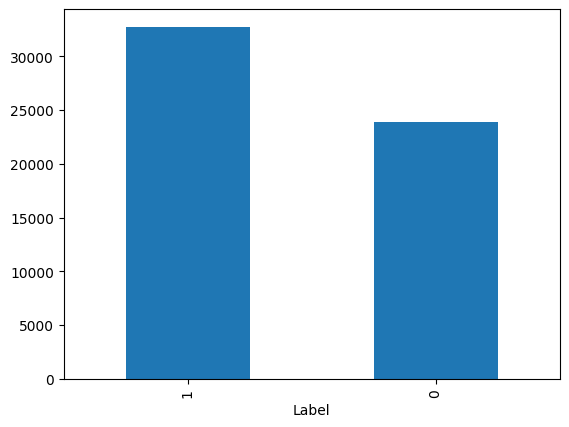

In [ ]:
# Analizar distribución de noticias falsas
data['Label'].value_counts().plot(kind='bar')

## Lenguaje natural

In [27]:
from nltk.stem import PorterStemmer
import nltk
import re

In [28]:
wpt = nltk.WordPunctTokenizer()
ps = PorterStemmer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')

def normalize_documents(doc):
  doc = re.sub(r'[^a-zA-Z\s]','',doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  tokens = wpt.tokenize(doc)
  filtered_token = [ps.stem(token) for token in tokens if token not in stop_words]
  doc = ' '.join(filtered_token)
  return doc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
normalize_corpus = np.vectorize(normalize_documents)
data['Titulo'] = data['Titulo'].apply(normalize_corpus)
data['Descripcion'] = data['Descripcion'].apply(normalize_corpus)
data.head(20)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,the guardian va snchez europa necesita apuesta...,diario britnico public pasado juev editori prx...,02/06/2023
1,ID,0,revelan gobierno negocio liberacin mirel cambi...,revelan gobierno negocio liberacin mirel cambi...,01/10/2023
2,ID,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castel fiesta grand conm...,25/04/2022
3,ID,1,iglesia alienta yolanda daz erc eh bildu negoc...,poltica igual negociar empresario negociar gru...,03/01/2022
4,ID,0,puigdemont sera ninguna tragedia repeticin ele...,entrevista punt avui lder jxcat desdramatizado...,09/03/2018
5,ID,1,pnv consolida mayora pse salva papel pp sigu m...,nacionalista consiguen alcalda bilbao donostia...,26/05/2019
6,ID,0,exconsejero nria marn pide indulto caso ere en...,familiar aluden honestidad integridad person m...,16/09/2022
7,ID,1,fiscala pide prisin incondicion siet cdr terro...,suprim delito rebelin imput inici marco operac...,26/09/2019
8,ID,1,jo manuel prez tornero creador televisin educa...,futuro presid rtve licenciado ciencia comunica...,25/02/2021
9,ID,0,ayusizacin bng santiago abasc instruy seguir e...,pablo santiago abasc planea vivir renta arroll...,10/05/2021


## N-Gramas

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bv = CountVectorizer(ngram_range=(2,3), max_features=10000)#Usa 10,000 palabras mas comunes

bv_matrix = bv.fit_transform(data['Titulo'])
bv_matrix2 = bv.fit_transform(data['Descripcion'])
bv_matrix = bv_matrix.toarray()
#bv_matrix2 = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,abierta posibilidad,abierta raz,abierto expedi,abierto investigacin,abierto puerta,abogado cristiano,abogado defensor,abogado javier,abogado jo,abordar asunto,...,xunta galicia,yeremi varga,yolanda daz,yolanda daz ion,yolanda fuent,zaragoza comn,zona baja,zona baja emi,zona ms,zu saynwittgenstein
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
